# Plotting Accumulated Rewards

In [34]:
import pandas as pd
import numpy as np
import glob
import re
from pandas import DataFrame

In [39]:
## First setting
list_of_files = glob.glob('./social/*3-12*.txt')   # create the list of file
dataset = DataFrame({"Step":range(400)})
count = 1;
for file_name in list_of_files:
    print(file_name)
    data = pd.read_csv(file_name,header=None)
    data = data.replace(" ", "")
    d = []
    for i in data.iloc[:,3]:
        i = re.sub(r'[ a-z]+','',i)
        d.append(i)
    dataset[str(count)] = d#.astype("float")
    #print([:5])
    count = count+1

./social/Social_3-12_eli.txt
./social/social_3-12_apoorva.txt
./social/social_3-12_xiang.txt
./social/social_3-12_cao.txt
./social/social_3-12_xianhao.txt
./social/social_3-12_lyu.txt
./social/Social_3-12_tim.txt
./social/social_3-12_snehal.txt
./social/social_3-12_lu.txt
./social/Social_3-12_marianne.txt
./social/Social_3-12_sanne.txt
./social/social_3-12_paul.txt
./social/social_3-12_han.txt
./social/social_3-12_simone.txt
./social/social_3-12_Ziyu.txt
./social/social_3-12_teresa.txt
./social/social_3-12_chitra.txt
./social/social_3-12_fanis.txt
./social/social_3-12_liu.txt
./social/social_3-12_shiyu.txt


In [40]:
print(dataset.head())

   Step    1    2    3    4    5    6    7    8    9 ...    11   12   13   14  \
0     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1     1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
2     2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3     3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4     4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

    15   16   17   18   19   20  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 21 columns]


In [44]:
reward = dataset.iloc[:,1:-1].values.astype('float')
print(reward)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [116.  53.  56. ...  29.  33.  25.]
 [116.  53.  56. ...  29.  33.  25.]
 [116.  53.  56. ...  30.  33.  25.]]


In [46]:
avg_reward = np.mean(reward,axis=1)
print(avg_reward.shape)
print(avg_reward)

(400,)
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.52631579  0.52631579  0.52631579  0.63157895  0.63157895
  0.63157895  1.15789474  1.15789474  1.68421053  1.68421053  1.68421053
  1.68421053  1.68421053  1.73684211  1.73684211  1.73684211  2.26315789
  2.26315789  2.26315789  2.26315789  2.26315789  2.26315789  2.26315789
  2.26315789  2.26315789  2.26315789  2.78947368  2.78947368  2.78947368
  2.78947368  2.78947368  2.84210526  3.36842105  3.36842105  3.42105263
  3.42105263  3.94736842  4.          4.52631579  4.52631579  5.05263158
  5.05263158  5.57894737  5.57894737  5.57894737  5.63157895  5.68421053
  5.68421053  5.68421053  5.78947368  5.84210526  5.84210526  5.84210526
  5.84210526  6.36842105  6.42105263  6.42105263  6.42105263  6.42105263
  6.42105263  6.42105263  6.42105263  6.94736842  6.94736842  7.
  7.          7.          7.          7.          7.05263158  7.0526

## Plotting rewards

In [217]:
## First setting
setting = '3-12'
def extract_reward_beta_social(setting):
    
    list_of_files = glob.glob('./social/*'+setting+'*.txt')   # create the list of file
    dataset = DataFrame({"Step":range(400)})
    dataset_beta = DataFrame({"Step":range(400)})
    count = 1;
    name_list = []
    for file_name in list_of_files:
        #print(file_name)
        #name = re.search(r'[./a-zA-Z0-9]_[a-z](.+?).txt',file_name)
        #name = re.search( r'(.*) are (.*?) .*', line,
        sub_name = './social/Social_'+setting+'_'
        start = file_name.find(sub_name) + len(sub_name)
        end = file_name.find('.txt',start)
        name = file_name[start:end]
        name = name.replace('_','')
        #print(name)
        data = pd.read_csv(file_name,header=None)
        data = data.replace(" ", "")
        d = []
        for i in data.iloc[:,3]:
            i = re.sub(r'[ a-z]+','',i)
            d.append(i)
        dataset[name] = d#.astype("float")
        dataset_beta[name]=data.iloc[:,2]
        #print(DataFrame.max(dataset_beta))
    
    return dataset,dataset_beta


def nonsocial_avg_reward():
    nonsocial_file = 'log_nonsocial29.txt'
    data = pd.read_csv(nonsocial_file,header=None)
    reward = data.iloc[:,1].values.astype('float')
    beta = data.iloc[:,2].values.astype('float')
    print(reward.shape)
    #print(reward)
    return(reward,beta)

In [218]:
setting1 = '3-12'
reward_df_s1, beta_df_s1 = extract_reward_beta_social(setting1)

setting2 = '12-3'
reward_df_s2,beta_df_s2 = extract_reward_beta_social(setting2)

reward_s1 = reward_df_s1.iloc[:,1:-1].values.astype('float')
beta_s1 = beta_df_s1.iloc[:,1:-1].values.astype('float')

reward_s2 = reward_df_s2.iloc[:,1:-1].values.astype('float')
beta_s2 = beta_df_s2.iloc[:,1:-1].values.astype('float')
    
idx_max = np.argmax(reward_df_s2.iloc[-1,1:-1].values.astype('float'))
idx_min = np.argmin(reward_df_s2.iloc[-1,1:-1].values.astype('float'))
    
beta_max = beta_df_s2.iloc[:,idx_max+1].values.astype('float')
beta_min = beta_df_s2.iloc[:,idx_min+1].values.astype('float')
    
avg_reward_s1 = np.mean(reward_s1,axis=1)
avg_beta_s1 = np.mean(beta_s1,axis=1)

avg_reward_s2 = np.mean(reward_s2,axis=1)
avg_beta_s2 = np.mean(beta_s2,axis=1)

#nonsocial
avg_reward_nonsocial,avg_beta_nonsocial = nonsocial_avg_reward()


(400,)


In [226]:
print(reward_df_s1.iloc[-4:-1,:])
print(reward_df_s2.iloc[-4:-1,:])

     Step    eli apoorva xiang   cao xianhao  lyu   tim snehal     lu  ...    \
396   396  116.0    53.0  56.0  20.0    26.0  8.0  25.0  270.0  142.0  ...     
397   397  116.0    53.0  56.0  20.0    26.0  8.0  25.0  280.0  142.0  ...     
398   398  116.0    53.0  56.0  20.0    26.0  8.0  25.0  280.0  142.0  ...     

     sanne   paul   han simone   Ziyu teresa chitra fanis   liu  shiyu  
396  240.0  102.0  47.0   18.0  105.0   41.0   29.0  33.0  25.0  130.0  
397  240.0  102.0  47.0   18.0  105.0   41.0   29.0  33.0  25.0  130.0  
398  240.0  102.0  47.0   18.0  105.0   41.0   29.0  33.0  25.0  130.0  

[3 rows x 21 columns]
     Step  Sury Shiyu   Ziyu fanis Bernd    han xianhao    lu apoorva  ...    \
396   396  39.0  36.0  231.0  52.0  171.0  26.0    19.0  17.0   103.0  ...     
397   397  39.0  36.0  231.0  52.0  171.0  26.0    19.0  18.0   103.0  ...     
398   398  39.0  36.0  231.0  52.0  171.0  27.0    19.0  18.0   103.0  ...     

     sanne snehal   eli   cao xiang   tim  

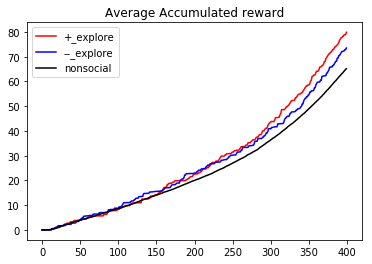

In [170]:
import matplotlib.pyplot as plt

plt.plot(range(400),avg_reward_s2,label='+_explore',color='red')
plt.plot(range(400), avg_reward_s1,label='--_explore',color='blue')
plt.plot(range(400),avg_reward_nonsocial,label='nonsocial',color='black')
#plt.axis([0, 6, 0, 20])
plt.title("Average Accumulated reward")
plt.legend()
plt.show()

## Plotting beta

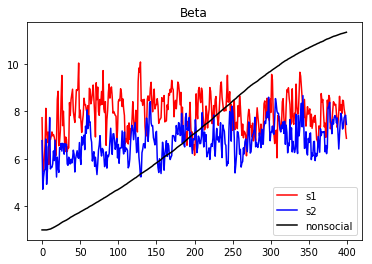

In [160]:
import matplotlib.pyplot as plt

plt.plot(range(400), avg_beta_s1,label='s1',color='red')
plt.plot(range(400),avg_beta_s2,label='s2',color='blue')
plt.plot(range(400),avg_beta_nonsocial,label='nonsocial',color='black')

plt.title("Beta")
#plt.axis([0, 6, 0, 20])
plt.legend()
plt.show()

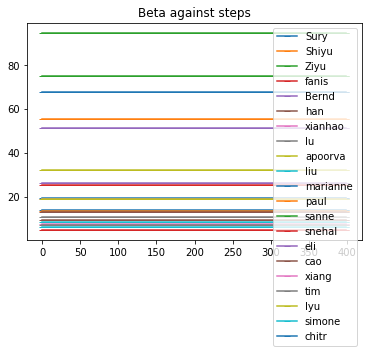

In [228]:
import matplotlib.pyplot as plt

mean_beta = np.mean(reward_s2,axis = 0)
for idx,col in enumerate(beta_df_s2.columns[1:-1]):
    plt.plot(range(400), [mean_beta[idx]]*400,label=col,marker="_")

plt.title("Beta against steps")
plt.legend()
plt.show()